## The Sparks Foundation

### #GRIPJUNE21

## Task : Prediction Using Unsupervised ML

### Data Scientist : Ashok Sihag

#### Step 1: Importing required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

#### Step 2: Load Dataset

In [3]:
iris = pd.read_csv('Iris.csv')

In [4]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.shape

(150, 6)

#### Step 3: Data Cleaning and preparation

In [6]:
#check for na value
iris.isna().sum().sum()

0

Data has no missing values

In [7]:
#droping irreleavant column Id

iris = iris.drop(['Id'], axis=1)

In [8]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Step 4: Exploratory Data Analysis

In [9]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [10]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


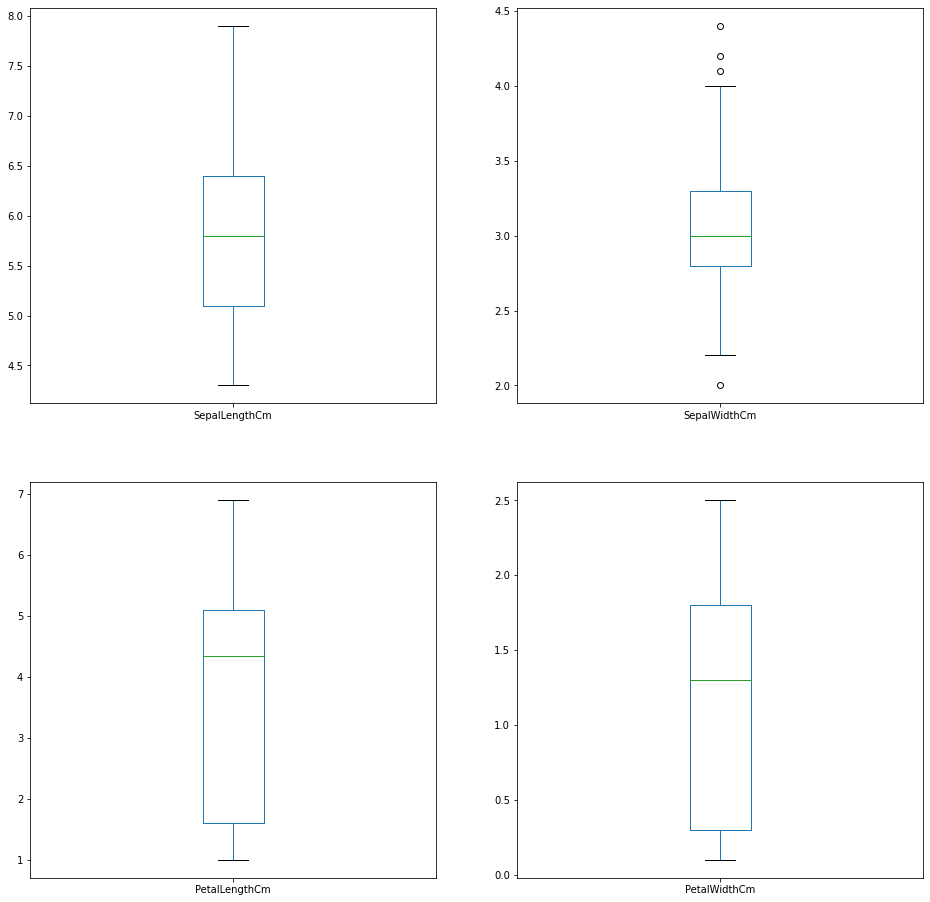

In [11]:
#checking for outliers using boxplot
iris.plot(kind='box', figsize=(16,16), layout=(2,2), sharex=False, subplots=True);

From boxplot we observe that SepalWidthCm has some outliers.
Before removing outliers we perfrom some more EDA

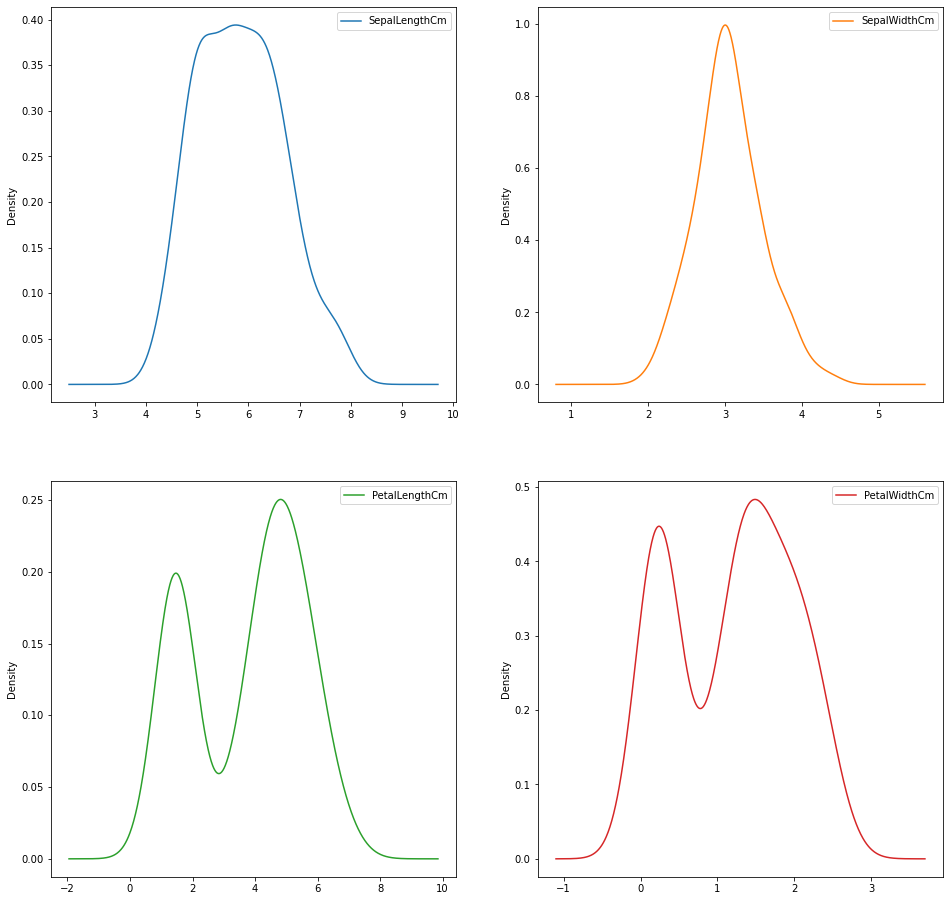

In [13]:
#ploting features of the dataset
iris.plot(kind='kde', figsize=(16,16), layout=(2,2), sharex=False, subplots=True);

Form kde plot we conclude that SepalLengthCm, SepalWidthCm are normaly distributed



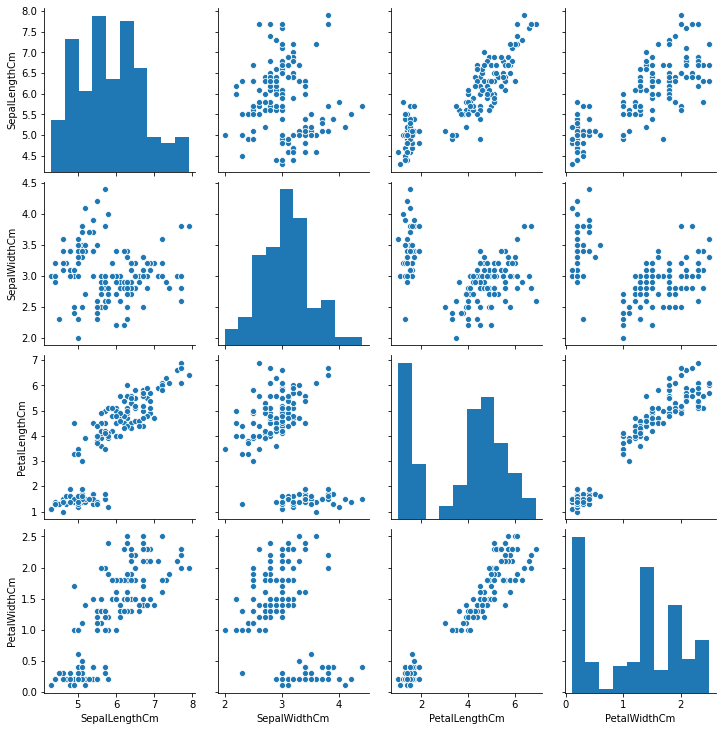

In [14]:
#pairplot for the features

sns.pairplot(iris);

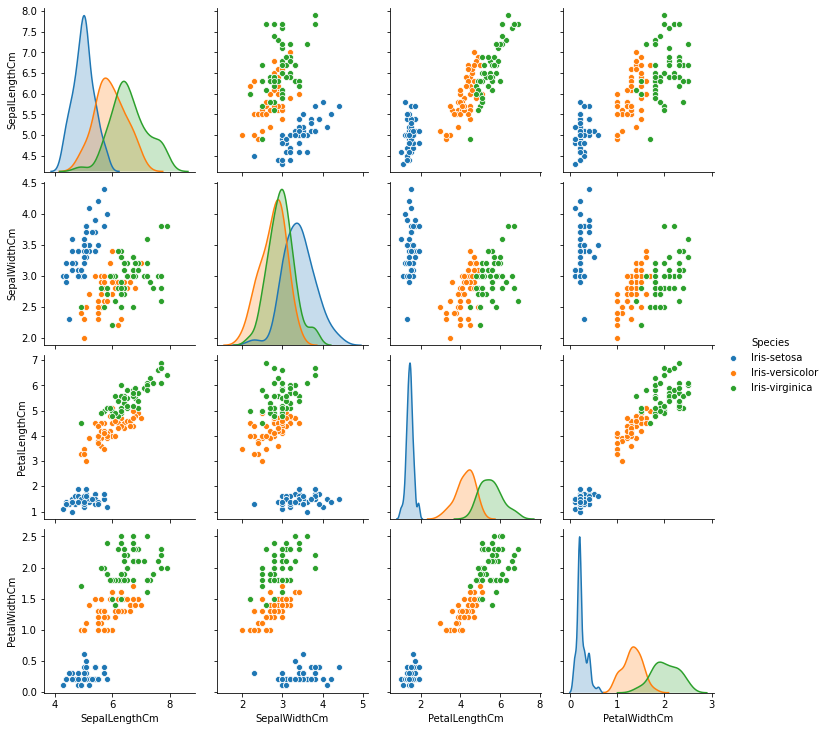

In [15]:
sns.pairplot(iris, hue='Species')

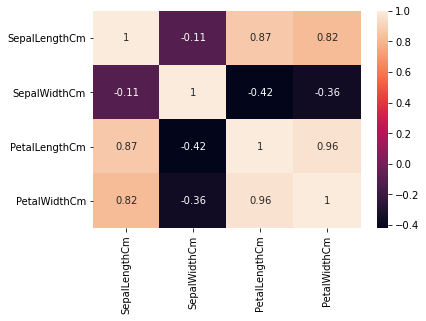

In [16]:
#prepare a correlation matrix
sns.heatmap(iris.corr(), annot=True);

We can see that there is a stong correlation between PetalLength and PetalWidth, while SepalWidth have negative coorelation

#### Step 5: Model Building

In [17]:
#Finding the optimum number of clusters for kmeans classification

x=iris.iloc[:,[0,1,2,3]].values

wcss=[]  #list of cluster sum of squares

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

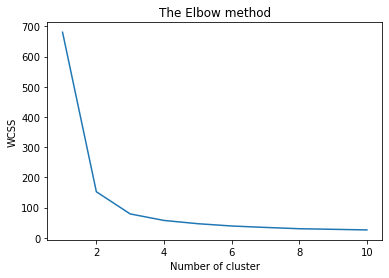

In [18]:
#plotting the result and observe the elbow curve

plt.plot(range(1,11),wcss)
plt.title('The Elbow method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')

From above plot, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares doesn't decrease significantly with iteration.

From above curve optimum number of cluster is 3

In [19]:
#creating kmeans classifier useing optimum number of cluster

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init = 10, random_state=0)

y = kmeans.fit_predict(x)

#### Step 6: Visualising the result

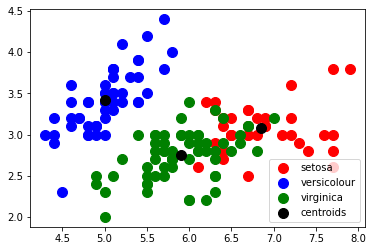

In [20]:
plt.scatter(x[y == 0, 0], x[y == 0, 1], s=100, c='red', label= 'setosa')
plt.scatter(x[y == 1, 0], x[y == 1, 1], s=100, c='blue', label= 'versicolour')
plt.scatter(x[y == 2, 0], x[y == 2, 1], s=100, c='green', label= 'virginica')

#plotting centroid

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='centroids')
plt.legend()